### 1. 서론

숫자 손글씨 인식은 기계 학습 및 딥러닝 분야에서 중요한 문제 중 하나입니다.  
특히, 이러한 인식 기술은 우편번호 분류, 자동차 번호판 인식, 자동 서명 인증 등 다양한 응용 분야에서 활용됩니다.  
본 레포트에서는 손으로 쓴 숫자 이미지를 딥러닝 모델을 사용하여 인식하는 방법을 소개합니다.  
이를 위해 MNIST(Mixed National Institute of Standards and Technology) 데이터셋을 사용했습니다.


x_train.shape=(60000, 28, 28)
y_train.shape=(60000,)
x_test.shape=(10000, 28, 28)
y_test.shape=(10000,)


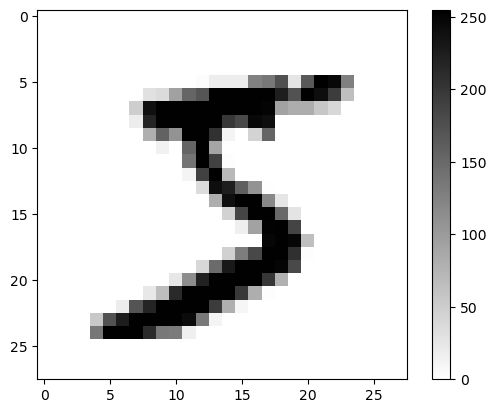

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data() 
print(f'x_train.shape={x_train.shape}') 
print(f'y_train.shape={y_train.shape}') 
print(f'x_test.shape={x_test.shape}') 
print(f'y_test.shape={y_test.shape}') 

plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [2]:
for row in x_train[0]:
    print(' '.join(['{:3}'.format(pixel) for pixel in row]))

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0   0   0 

### 2. 모델 설계 및 학습

인공 신경망(MLP, Multi-Layer Perceptron)과 Convolutional Neural Network (CNN) 모델을 설계하여 숫자 이미지를 인식합니다.  
데이터를 학습 세트와 검증 세트로 나누고, 모델을 컴파일하여 손실 함수와 최적화 알고리즘을 설정합니다.  
모델을 학습하고 정확도를 평가합니다.  
CNN 모델의 정확도가 더 높아 앞으로 이 모델을 사용합니다.  
이 모델은 입력층, 합성곱층, 풀링층, 완전 연결층, 출력층으로 구성되어 있습니다.  

In [3]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)



Epoch 1/5


1875/1875 [==============================] - 3s 1ms/step - loss: 0.3019 - accuracy: 0.9118
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1454 - accuracy: 0.9564
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1096 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0892 - accuracy: 0.9733
Epoch 5/5
313/313 [==============================] - 0s 929us/step - loss: 0.0745 - accuracy: 0.9779


[0.07451228052377701, 0.9779000282287598]

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
# 데이터 로드 및 전처리
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train[..., tf.newaxis]/255.0, x_test[..., tf.newaxis]/255.0

# CNN 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.23), 
    layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 모델 평가
model.evaluate(x_test, y_test)



Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1390 - accuracy: 0.9575 - val_loss: 0.0518 - val_accuracy: 0.9828
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.0273 - val_accuracy: 0.9898
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0346 - accuracy: 0.9892 - val_loss: 0.0299 - val_accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0269 - accuracy: 0.9919 - val_loss: 0.0312 - val_accuracy: 0.9909
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0238 - accuracy: 0.9923


[0.023834314197301865, 0.9922999739646912]

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

313/313 [==============================] - 1s 2ms/step


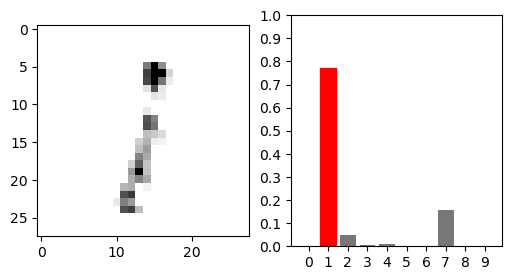

In [25]:
import numpy as np
import matplotlib.pyplot as plt

predicted_data_num = 6572
predictions = model.predict(x_test)

plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.imshow(x_test[predicted_data_num], cmap=plt.cm.binary)

plt.subplot(1,2,2)
plt.xticks(range(10))
plt.yticks(np.arange(0, 1.1, 0.1))
thisplot = plt.bar(range(10), predictions[predicted_data_num], color="#777777")
plt.ylim([0, 1])

predicted_label = np.argmax(predictions[predicted_data_num])
thisplot[predicted_label].set_color('red')

plt.show()

6572번째 데이터를 가져왔습니다.  
각 특성별 확률 그래프를 만들고 가장 높은 확률의 특성값으로 예측합니다.

313/313 [==============================] - 1s 2ms/step


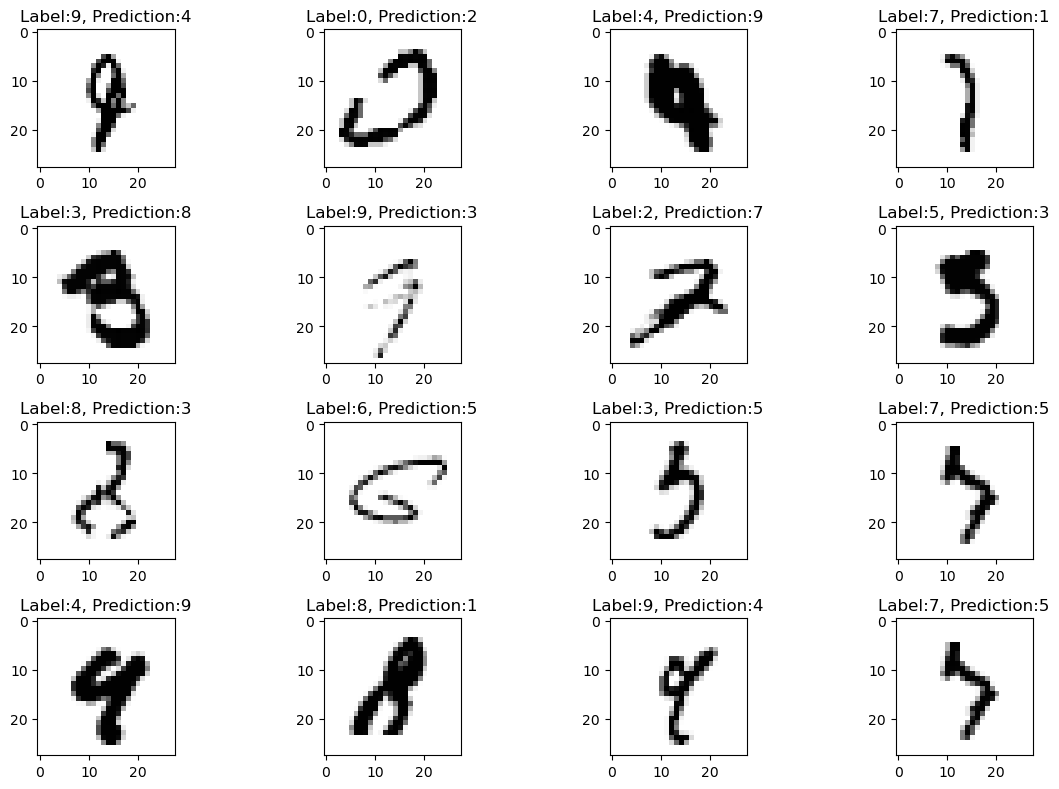

In [26]:
import random

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = y_test

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

학습에 실패한 데이터 중 랜덤하게 16개 뽑아서 확인해 본 결과입니다.  
사람의 눈으로도 제대로 인식하기 어려운 데이터도 보입니다.

### 3. 예측 프로그램 작성

학습된 모델을 사용하여 프로그램을 작성했습니다.  
Canvas에 숫자를 손글씨로 쓰면 이미지를 학습된 모델을 통해 예측한 결과를 나타냅니다.  
가장 높은 확률을 갖는 클래스의 인덱스를 가져와 예측 결과를 출력합니다.

In [7]:
from PIL import ImageGrab, ImageTk, Image
import tkinter as tk
import io
import numpy as np

def draw(event):
    x, y = event.x, event.y
    draw_area.create_oval(x, y, x+20, y+20, fill="black") # 붓 크기, 색

def convert_to_array():
    # 캔버스 이미지를 스크린샷으로 찍기
    screenshot = ImageGrab.grab(bbox=(draw_area.winfo_rootx(), draw_area.winfo_rooty(), 
                                     draw_area.winfo_rootx() + draw_area.winfo_width(), 
                                     draw_area.winfo_rooty() + draw_area.winfo_height()))
    # 이미지 크기를 28x28로 조정
    screenshot = screenshot.resize((28, 28), Image.LANCZOS)
    # 이미지를 흑백으로 변환하여 배열로 변환
    image_array = np.array(screenshot.convert('L'))
    # 이미지 반전
    image_array = 255 - image_array
    return image_array

def predict_digit():
    image_array = convert_to_array()
    normalized_image = image_array / 255.0
    
    # 이미지를 Tkinter 창에 표시
    img = Image.fromarray(image_array.astype(np.uint8))
    img = img.resize((image_array.shape[1]*10, image_array.shape[0]*10))
    img = ImageTk.PhotoImage(img)
    image_label.img = img
    image_label.config(image=img)
    
    # CNN 모델에서 예측을 위해 4차원 배열로 변경 (배치 크기 1 추가)
    input_image = np.expand_dims(normalized_image, axis=(0, -1))

    # 모델을 사용하여 예측
    prediction = model.predict(input_image)
    
    # 가장 높은 확률을 갖는 클래스의 인덱스 가져오기
    predicted_class_index = np.argmax(prediction)

    # 예측 결과 출력
    text_label.config(text=f"Predicted class: {predicted_class_index}")
    
    
def clear():
    draw_area.delete("all")


root = tk.Tk()
root.title("Handwritten Digit Recognition")

canvas_width = 280
canvas_height = 280

draw_area = tk.Canvas(root, width=canvas_width, height=canvas_height, bg="white")
draw_area.grid(row=0, column=0, padx=10, pady=10, columnspan=2)

draw_area.bind("<B1-Motion>", draw)

image_label = tk.Label(root, image=None)
image_label.grid(row=0, column=2, padx=10, pady=10)

text_label = tk.Label(root, text="")
text_label.grid(row=1, column=2, padx=10, pady=10)

predict_button = tk.Button(root, text="Predict Digit", command=predict_digit)
predict_button.grid(row=1, column=0, padx=10, pady=10, sticky="e")

clear_button = tk.Button(root, text="Clear", command=clear)
clear_button.grid(row=1, column=1, padx=10, pady=10, sticky="w")

root.mainloop()


![숫자손글씨](숫자손글씨.png)

In [8]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def predict_digit():
    image_array = convert_to_array()
    normalized_image = image_array / 255.0
    
    # CNN 모델에서 예측을 위해 4차원 배열로 변경 (배치 크기 1 추가)
    input_image = np.expand_dims(normalized_image, axis=(0, -1))

    # 모델을 사용하여 예측
    prediction = model.predict(input_image)
    
    # 가장 높은 확률을 갖는 클래스의 인덱스 가져오기
    predicted_class_index = np.argmax(prediction)

    # 예측 결과 출력
    text_label.config(text=f"Predicted class: {predicted_class_index}")
    
    # 예측 시각화
    plt.clf()  # 현재 그래프 지우기
    
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))

    axs[0].imshow(image_array, cmap=plt.cm.binary)
    axs[0].set_title('Input Image')

    axs[1].bar(range(10), prediction[0], color="#777777")
    axs[1].set_xticks(range(10))
    axs[1].set_yticks(np.arange(0, 1.1, 0.1))
    axs[1].set_ylim([0, 1])
    axs[1].set_title('Prediction')

    axs[1].bar(predicted_class_index, prediction[0, predicted_class_index], color='red')

    # Matplotlib 그래프를 Tkinter 창에 표시
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.grid(row=0, column=2, padx=10, pady=10)

    # 그래프 업데이트
    canvas.draw()

def draw(event):
    x, y = event.x, event.y
    draw_area.create_oval(x, y, x+20, y+20, fill="black") # 붓 크기, 색
    
def convert_to_array():
    # 캔버스 이미지를 스크린샷으로 찍기
    screenshot = ImageGrab.grab(bbox=(draw_area.winfo_rootx(), draw_area.winfo_rooty(), 
                                     draw_area.winfo_rootx() + draw_area.winfo_width(), 
                                     draw_area.winfo_rooty() + draw_area.winfo_height()))
    # 이미지 크기를 28x28로 조정
    screenshot = screenshot.resize((28, 28), Image.LANCZOS)
    # 이미지를 흑백으로 변환하여 배열로 변환
    image_array = np.array(screenshot.convert('L'))
    # 이미지 반전
    image_array = 255 - image_array
    return image_array
    
def clear():
    draw_area.delete("all")
    
def close_window():
    plt.close()  # Matplotlib 창 닫기
    if root:
        root.destroy()  # GUI 창 닫기

    
root = tk.Tk()
root.title("Handwritten Digit Recognition")

canvas_width = 280
canvas_height = 280

draw_area = tk.Canvas(root, width=canvas_width, height=canvas_height, bg="white")
draw_area.grid(row=0, column=0, padx=10, pady=10, columnspan=2)

draw_area.bind("<B1-Motion>", draw)

text_label = tk.Label(root, text="")
text_label.grid(row=1, column=2, padx=10, pady=10)

predict_button = tk.Button(root, text="Predict Digit", command=predict_digit)
predict_button.grid(row=1, column=0, padx=10, pady=10, sticky="e")

clear_button = tk.Button(root, text="Clear", command=clear)
clear_button.grid(row=1, column=1, padx=10, pady=10, sticky="w")

# GUI 창이 닫힐 때 호출될 함수 지정
root.protocol("WM_DELETE_WINDOW", close_window)

root.mainloop()


![손글씨그래프](손글씨그래프.png)

In [9]:
import tkinter as tk
from tkinter import Text, END
import numpy as np
import time

drawing = False  # 마우스 버튼을 누를 때 그리기가 시작됨을 나타내는 변수
drawn_coords = []  # 사용자가 그린 좌표를 저장하는 변수
recognition_timer = None  # 숫자 인식을 위한 타이머 변수

def draw(event):
    global drawing, drawn_coords, recognition_timer
    if drawing:  # drawing이 True일 때만 그리기 작업 수행
        x, y = event.x, event.y
        draw_area.create_oval(x, y, x+20, y+20, fill="black") # 붓 크기, 색
        drawn_coords.append((x, y))  # 그려진 좌표 저장
        if recognition_timer:  # 인식 타이머가 있다면
            root.after_cancel(recognition_timer)  # 타이머를 취소하고
            recognition_timer = None  # 타이머 변수 초기화

def start_drawing(event):
    global drawing, drawn_coords, recognition_timer
    drawing = True
    drawn_coords = []  # 그림을 새로 그릴 때마다 drawn_coords 초기화
    if recognition_timer:  # 인식 타이머가 있다면
        root.after_cancel(recognition_timer)  # 타이머를 취소하고
        recognition_timer = None  # 타이머 변수 초기화

def stop_drawing(event):
    global drawing, recognition_timer
    drawing = False
    if not recognition_timer:  # 인식 타이머가 없다면
        recognition_timer = root.after(1000, recognize_and_predict)  # 1초 후에 숫자를 인식하도록 호출

def recognize_and_predict():
    global recognition_timer
    if not drawn_coords:
        return  # 그림이 없을 경우 인식하지 않음
    image_array = convert_to_array()
    normalized_image = image_array / 255.0
    # CNN 모델에서 예측을 위해 4차원 배열로 변경 (배치 크기 1 추가)
    input_image = np.expand_dims(normalized_image, axis=(0, -1))
    recognized_digit = recognize_digit(input_image)
    result_text.insert(END, recognized_digit)
    clear_canvas()
    recognition_timer = None  # 숫자가 인식된 후에는 타이머 변수 초기화

def recognize_digit(input_image):
    # 모델을 사용하여 예측
    prediction = model.predict(input_image)
    
    # 가장 높은 확률을 갖는 클래스의 인덱스 가져오기
    predicted_class_index = np.argmax(prediction)
    return predicted_class_index  # 인식된 숫자를 반환하는 대신에 임시 문자 "X"를 반환합니다.

def convert_to_array():
    # 캔버스 이미지를 스크린샷으로 찍기
    screenshot = ImageGrab.grab(bbox=(draw_area.winfo_rootx(), draw_area.winfo_rooty(), 
                                     draw_area.winfo_rootx() + draw_area.winfo_width(), 
                                     draw_area.winfo_rooty() + draw_area.winfo_height()))
    # 이미지 크기를 28x28로 조정
    screenshot = screenshot.resize((28, 28), Image.LANCZOS)
    # 이미지를 흑백으로 변환하여 배열로 변환
    image_array = np.array(screenshot.convert('L'))
    # 이미지 반전
    image_array = 255 - image_array
    return image_array

def clear_canvas():
    draw_area.delete("all")  # 캔버스를 초기화합니다.
    
    
root = tk.Tk()
root.title("Handwritten Digit Recognition")

canvas_width = 280
canvas_height = 280

draw_area = tk.Canvas(root, width=canvas_width, height=canvas_height, bg="white")
draw_area.grid(row=1, column=0, padx=10, pady=10)

draw_area.bind("<Button-1>", start_drawing)
draw_area.bind("<B1-Motion>", draw)
draw_area.bind("<ButtonRelease-1>", stop_drawing)

result_text = Text(root, height=2, width=30)
result_text.grid(row=0, column=0, padx=10, pady=10)

root.mainloop()


![숫자입력1](숫자입력1.png)
![숫자입력2](숫자입력2.png)
![숫자입력3](숫자입력3.png)

### 5. 결과 및 결론

학습된 모델의 성능을 평가한 결과, 약 99%의 정확도를 달성했습니다.  
이는 MNIST 데이터셋에 대해 우수한 성능을 나타냅니다.  
그러나, 새로운 손글씨 인식에서 다소 아쉬운 성능입니다.  
앞으로 더 큰 데이터셋과 더 복잡한 모델을 사용하여 성능을 향상시킬 수 있습니다.